# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', -1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [5]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [28]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [7]:
numeric = ['age', 'failures', 'absences']
cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
      'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
      'higher', 'internet', 'romantic']
ordered_cat = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
              'goout', 'Dalc', 'Walc', 'health']

In [8]:
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'
data.loc[data['Medu'] == 'o', 'Medu'] = 0
data.loc[data['Fedu'] == 'o', 'Fedu'] = 0
data['Medu'] = data['Medu'].astype(int)
data['Fedu'] = data['Fedu'].astype(int)

In [9]:
data[ordered_cat].describe()

,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health
count,1044.000000,1044.000000,1044.000000,1044.000000,1034.000000,1044.000000,1044.000000,1034.000000,1034.000000,1044.000000
mean,2.603448,2.387931,1.522989,1.970307,3.936170,3.201149,3.156130,1.497099,2.291103,3.543103
std,1.124907,1.099938,0.731727,0.834353,0.933297,1.031507,1.152575,0.914808,1.287883,1.424703
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000
50%,3.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000
75%,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000
max,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
data[cat].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1034
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,664


In [29]:
data[numeric].describe()

,age,failures,absences
count,991.000000,991.000000,991.000000
mean,16.711403,0.252270,4.125126
std,1.198257,0.639549,4.921247
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000
50%,17.000000,0.000000,2.000000
75%,18.000000,0.000000,6.000000
max,20.000000,3.000000,28.000000


In [30]:
data[data['failures'] == 0].shape

(824, 34)

In [31]:
data = data.drop(columns=['cheating', 'ID']).dropna()
data

KeyError: "['cheating' 'ID'] not found in axis"

In [32]:
data = data[data['absences'] < 30]

In [33]:
data = data[data['age'] < 21]

In [34]:
for x in cat:
    if data[x].any() == 'no':
        data[x] = data[x].map({'yes': 1, "no": 0})
for x in cat:
    if data[x].any() == 'yes':
        data[x] = data[x].map({'yes': 1, "no": 0})
data['Pstatus'] = data['Pstatus'].map({'T': 1, "A": 0})
data['famsize'] = data['famsize'].map({'GT3': 1, "LE3": 0})
data['address'] = data['address'].map({'U': 1, "R": 0})
data['school'] = data['school'].map({'GP': 1, "MS": 0})
data['sex'] = data['sex'].map({'M': 1, "F": 0})
data['Subject'] = data['Subject'].map({'Por': 1, "Math": 0})
#data

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [36]:
data.shape


(991, 34)

In [37]:
columns = pd.DataFrame(OneHotEncoder().fit_transform(data[['Mjob', 'Fjob', 
      'reason', 'guardian']]).toarray())
#columns

In [38]:
num_stand_with_g1 = pd.DataFrame(StandardScaler().fit_transform(data[numeric]), columns=numeric)
#num_stand_with_g1

In [39]:
new_data = data.reset_index()
new_data = pd.concat([new_data, columns], axis=1)
new_data = new_data.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian', 'index'])
new_data = new_data.drop(columns=numeric)
new_data = pd.concat([new_data, num_stand_with_g1], axis=1)
#new_data = new_data.drop(columns=['age'])
new_data

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,...,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,age,failures,absences
0,NaN,NaN,NaN,NaN,NaN,NaN,3,4,1,1,0,0,0,0,1,1,1,0,3.0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.593998,-0.394650,1.600987
1,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1,2,0,0,0,1,0,1,1,0,5.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.240969,-0.394650,-0.432045
2,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,1,0,0,0,0,0,1,1,0,4.0,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.593998,2.734134,-0.838651
3,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,2,0,0,0,1,1,1,1,0,4.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.240969,-0.394650,-0.025439
4,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,1,0,0,0,1,1,1,1,1,3.0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.075936,-0.394650,-0.432045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,2,0,1,0,0,1,1,1,1,4.0,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.428965,-0.394650,-0.025439
987,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,2,0,0,0,0,1,1,1,0,4.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.593998,-0.394650,-0.838651
988,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,3,0,1,1,1,1,1,1,1,4.0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.428965,2.734134,0.787774
989,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,2,0,0,0,1,1,1,1,1,5.0,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.428965,-0.394650,-0.025439


In [40]:
math = new_data[new_data['Subject'] == 0]
por = new_data[new_data['Subject'] == 1]

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

### С G1

#### Линейная регрессия

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [42]:
y_math = math['G3']
math = math.drop(columns=['G3'])
y_por = por['G3']
por = por.drop(columns=['G3'])

In [43]:
math = math.drop(columns=['G2'])
por = por.drop(columns=['G2'])

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(math, y_math, test_size=0.3, random_state=17)

In [ ]:
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(por, y_por, test_size=0.3, random_state=17)

In [27]:
lin_reg_math = LinearRegression()
lin_reg_math.fit(X_train_math, y_train_math)
y_test_pred_math = lin_reg_math.predict(X_test_math)

In [28]:
from sklearn.metrics import r2_score

In [29]:
print('math r2_score is:', r2_score(y_test_math, y_test_pred_math))

math r2_score is: 0.6129747243716823


In [30]:
lin_reg_por = LinearRegression()
lin_reg_por.fit(X_train_por, y_train_por)
y_test_pred_por = lin_reg_por.predict(X_test_por)
print('por r2_score is:', r2_score(y_test_por, y_test_pred_por))

por r2_score is: 0.6486853182962131


#### Лассо регрессия

In [31]:
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

In [32]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
lasso_cv_math = LassoCV(alphas=alphas, cv=3).fit(X_train_math, y_train_math)
lasso_cv_math.alpha_

0.2492462311557789

In [33]:
lasso_math = Lasso(alpha=lasso_cv_math.alpha_).fit(X_train_math, y_train_math)
y_test_lasso_pred_math = lasso_math.predict(X_test_math)
print('math lasso r2_score is:', r2_score(y_test_math, y_test_lasso_pred_math))

math lasso r2_score is: 0.6537841633481198


In [34]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
lasso_cv_por = LassoCV(alphas=alphas, cv=3).fit(X_train_por, y_train_por)
lasso_cv_por.alpha_

0.2989949748743719

In [35]:
lasso_por = Lasso(alpha=lasso_cv_por.alpha_).fit(X_train_por, y_train_por)
y_test_lasso_pred_por = lasso_por.predict(X_test_por)
print('por lasso r2_score is:', r2_score(y_test_por, y_test_lasso_pred_por))

por lasso r2_score is: 0.6518455623845882


#### Ридж регрессия

In [36]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_cv_math = RidgeCV(alphas=ridge_alphas, cv=3).fit(X_train_math, y_train_math)
ridge_math = Ridge(alpha=ridge_cv_math.alpha_).fit(X_train_math, y_train_math)
y_test_ridge_pred_math = ridge_math.predict(X_test_math)
print('math ridge r2_score is:', r2_score(y_test_math, y_test_ridge_pred_math))

math ridge r2_score is: 0.6554471420936445


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_cv_por = RidgeCV(alphas=ridge_alphas, cv=3).fit(X_train_por, y_train_por)
ridge_por = Ridge(alpha=ridge_cv_por.alpha_).fit(X_train_por, y_train_por)
y_test_ridge_pred_por = ridge_por.predict(X_test_por)
print('por ridge r2_score is:', r2_score(y_test_por, y_test_ridge_pred_por))

por ridge r2_score is: 0.6633742575545472


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Полиномиальная регрессия

In [38]:
poly_features_math = PolynomialFeatures(degree=2, include_bias=False).fit(X_train_math)
X_train_poly2_math = poly_features_math.transform(X_train_math)

In [39]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
lasso_cv_math_poly = LassoCV(alphas=alphas, cv=3).fit(X_train_poly2_math, y_train_math)
lasso_poly2_math = Lasso(alpha=lasso_cv_math_poly.alpha_).fit(X_train_poly2_math, y_train_math)
y_test_lasso_poly2_pred_math = lasso_poly2_math.predict(poly_features_math.transform(X_test_math))
print('math lasso poly r2_score is:', r2_score(y_test_math, y_test_lasso_poly2_pred_math))

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9877729016372996, tolerance: 0.34451445086705207
  positive)


math lasso poly r2_score is: 0.6714871104131301


C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6247010934142736, tolerance: 0.40615
  positive)


In [40]:
poly_features_por = PolynomialFeatures(degree=2, include_bias=False).fit(X_train_por)
X_train_poly2_por = poly_features_por.transform(X_train_por)
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
lasso_cv_por_poly = LassoCV(alphas=alphas, cv=3).fit(X_train_poly2_por, y_train_por)
lasso_poly2_por = Lasso(alpha=lasso_cv_por_poly.alpha_).fit(X_train_poly2_por, y_train_por)
y_test_lasso_poly2_pred_por = lasso_poly2_por.predict(poly_features_por.transform(X_test_por))
print('por lasso poly r2_score is:', r2_score(y_test_por, y_test_lasso_poly2_pred_por))

por lasso poly r2_score is: 0.671744241874173


#### KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

In [42]:
neigh_math = KNeighborsRegressor(n_neighbors=15).fit(X_train_math, y_train_math)
y_neigh_pred_math = neigh_math.predict(X_test_math)
print('math neigh r2_score is:', r2_score(y_test_math, y_neigh_pred_math))

math neigh r2_score is: 0.7176225977613662


In [43]:
neigh_por = KNeighborsRegressor(n_neighbors=18).fit(X_train_por, y_train_por)
y_neigh_pred_por = neigh_por.predict(X_test_por)
print('por neigh r2_score is:', r2_score(y_test_por, y_neigh_pred_por))

por neigh r2_score is: 0.6221728089926473


#### Radius Neighbors

In [ ]:
radius_math = RadiusNeighborsRegressor().fit(X_train_math, y_train_math)
y_radius_pred_math = neigh_math.predict(X_test_math)
print('math radius r2_score is:', r2_score(y_test_math, y_radius_pred_math))

In [ ]:
radius_por = RadiusNeighborsRegressor().fit(X_train_por, y_train_por)
y_radius_pred_por = neigh_por.predict(X_test_por)
print('por radius r2_score is:', r2_score(y_test_por, y_radius_pred_por))

#### Дерево решений

### Без G1

In [46]:
math = math.drop(columns=['G1'])
por = por.drop(columns=['G1'])

In [47]:
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(math, y_math, test_size=0.3, random_state=17)
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(por, y_por, test_size=0.3, random_state=17)

#### Линейная регрессия

In [48]:
lin_reg_math_new = LinearRegression()
lin_reg_math_new.fit(X_train_math, y_train_math)
y_test_pred_math = lin_reg_math_new.predict(X_test_math)
print('math r2_score is:', r2_score(y_test_math, y_test_pred_math))
lin_reg_por_new = LinearRegression()
lin_reg_por_new.fit(X_train_por, y_train_por)
y_test_pred_por = lin_reg_por_new.predict(X_test_por)
print('por r2_score is:', r2_score(y_test_por, y_test_pred_por))

math r2_score is: 0.15685891032437604
por r2_score is: 0.2898362586736406


#### Лассо регрессия

In [49]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
lasso_cv_math_new = LassoCV(alphas=alphas, cv=3).fit(X_train_math, y_train_math)
lasso_math_new = Lasso(alpha=lasso_cv_math_new.alpha_).fit(X_train_math, y_train_math)
y_test_lasso_pred_math = lasso_math_new.predict(X_test_math)
print('math lasso r2_score is:', r2_score(y_test_math, y_test_lasso_pred_math))
lasso_cv_por_new = LassoCV(alphas=alphas, cv=3).fit(X_train_por, y_train_por)
lasso_por_new = Lasso(alpha=lasso_cv_por_new.alpha_).fit(X_train_por, y_train_por)
y_test_lasso_pred_por = lasso_por_new.predict(X_test_por)
print('por lasso r2_score is:', r2_score(y_test_por, y_test_lasso_pred_por))

math lasso r2_score is: 0.15978423502269667
por lasso r2_score is: 0.30046573077062066


#### Ридж регрессия

In [50]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_cv_math_new = RidgeCV(alphas=ridge_alphas, cv=3).fit(X_train_math, y_train_math)
ridge_math_new = Ridge(alpha=ridge_cv_math_new.alpha_).fit(X_train_math, y_train_math)
y_test_ridge_pred_math = ridge_math_new.predict(X_test_math)
print('math ridge r2_score is:', r2_score(y_test_math, y_test_ridge_pred_math))
ridge_cv_por_new = RidgeCV(alphas=ridge_alphas, cv=3).fit(X_train_por, y_train_por)
ridge_por_new = Ridge(alpha=ridge_cv_por_new.alpha_).fit(X_train_por, y_train_por)
y_test_ridge_pred_por = ridge_por_new.predict(X_test_por)
print('por ridge r2_score is:', r2_score(y_test_por, y_test_ridge_pred_por))

math ridge r2_score is: 0.2016765623869835
por ridge r2_score is: 0.30524841938517144


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Полиномиальная регрессия

In [51]:
poly_features_math_new = PolynomialFeatures(degree=2, include_bias=False).fit(X_train_math)
X_train_poly2_math = poly_features_math_new.transform(X_train_math)
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
lasso_cv_math_poly_new = LassoCV(alphas=alphas, cv=3).fit(X_train_poly2_math, y_train_math)
lasso_poly2_math_new = Lasso(alpha=lasso_cv_math_poly_new.alpha_).fit(X_train_poly2_math, y_train_math)
y_test_lasso_poly2_pred_math = lasso_poly2_math_new.predict(poly_features_math_new.transform(X_test_math))
print('math lasso poly r2_score is:', r2_score(y_test_math, y_test_lasso_poly2_pred_math))
poly_features_por_new = PolynomialFeatures(degree=2, include_bias=False).fit(X_train_por)
X_train_poly2_por = poly_features_por_new.transform(X_train_por)
lasso_cv_por_poly_new = LassoCV(alphas=alphas, cv=3).fit(X_train_poly2_por, y_train_por)
lasso_poly2_por_new = Lasso(alpha=lasso_cv_por_poly_new.alpha_).fit(X_train_poly2_por, y_train_por)
y_test_lasso_poly2_pred_por = lasso_poly2_por_new.predict(poly_features_por_new.transform(X_test_por))
print('por lasso poly r2_score is:', r2_score(y_test_por, y_test_lasso_poly2_pred_por))

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5638909798191207, tolerance: 0.3873075144508671
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.018060744618424, tolerance: 0.3873075144508671
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7427111563852122, tolerance: 0.34451445086705207
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6483775666509928, tolerance: 0.344514450867

math lasso poly r2_score is: 0.1920925292836272
por lasso poly r2_score is: 0.30903137458261065


#### kNN

In [52]:
neigh_math_new = KNeighborsRegressor(n_neighbors=15).fit(X_train_math, y_train_math)
y_neigh_pred_math = neigh_math_new.predict(X_test_math)
print('math neigh r2_score is:', r2_score(y_test_math, y_neigh_pred_math))
neigh_por_new = KNeighborsRegressor(n_neighbors=18).fit(X_train_por, y_train_por)
y_neigh_pred_por = neigh_por_new.predict(X_test_por)
print('por neigh r2_score is:', r2_score(y_test_por, y_neigh_pred_por))

math neigh r2_score is: 0.2479965891934668
por neigh r2_score is: 0.16417895809076255


#### Radius Neighbors

In [53]:
radius_math_new = RadiusNeighborsRegressor().fit(X_train_math, y_train_math)
y_radius_pred_math = neigh_math_new.predict(X_test_math)
print('math radius r2_score is:', r2_score(y_test_math, y_radius_pred_math))
radius_por_new = RadiusNeighborsRegressor().fit(X_train_por, y_train_por)
y_radius_pred_por = neigh_por_new.predict(X_test_por)
print('por radius r2_score is:', r2_score(y_test_por, y_radius_pred_por))

math radius r2_score is: 0.2479965891934668
por radius r2_score is: 0.16417895809076255


#### Дерево решений

## Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [72]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 
import matplotlib.pyplot as plt

import numpy as np

classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [73]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [74]:
train_labels

array([2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2,
       1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 0, 1, 1])

In [75]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [76]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    import matplotlib.pyplot
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

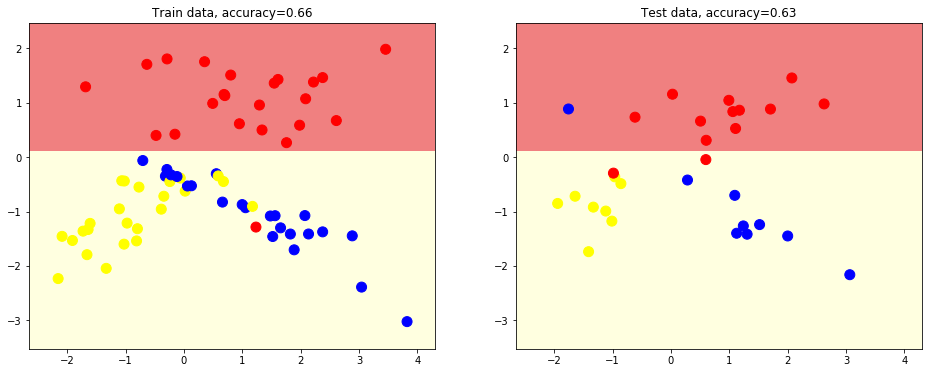

In [77]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [81]:
test_labels

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 2, 0])